<a href="https://colab.research.google.com/github/SeptaNanda/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan: 50


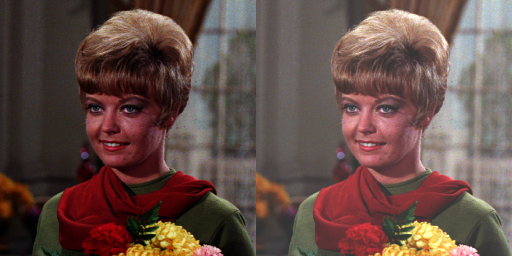

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brigthness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brigthness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukan nilai kecerahan: 60
Masukan nilai kontras: 3


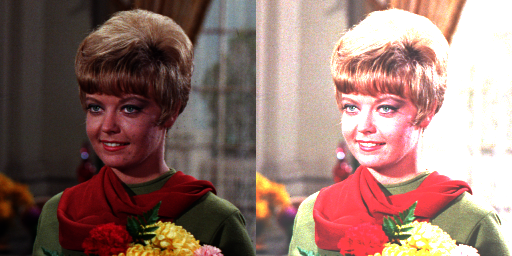

In [ ]:
# mengubah kontras dan tingkat kecerahan citra
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brigthness = int(input('Masukan nilai kecerahan: '))
  kontras = int(input('Masukan nilai kontras: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)
kontras_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brigthness, 0, 255)
      kontras_image[y,x,c] = np.clip(kontras * original[y,x,c] + brigthness, 0, 255)

final_frame = cv.hconcat((original, kontras_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukan nilai kecerahan: 40


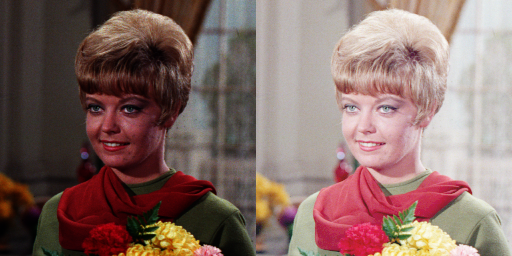

In [ ]:
# mengubah tingkat kecerahan citra dengan Transformasi Log
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brigthness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
   
c = 255 / np.log(1 + np.max(original))
log_image = c * (np.log(original + 1))
   
log_image = np.array(log_image, dtype = np.uint8)
   
final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

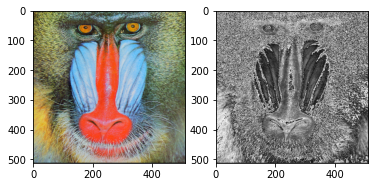

In [ ]:
# Averaging

img = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
color_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

R, G, B = color_img[:, :, 0], color_img[:, :, 1], color_img[:, :, 2]

gray_img = (R + G + B)/3
#gray_img = np.mean(color_img, axis=2)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

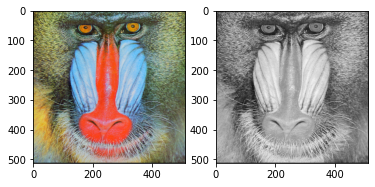

In [ ]:
# Lightness
img = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
color_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

R, G, B = color_img[:, :, 0], color_img[:, :, 1], color_img[:, :, 2]
max_chanels = np.maximum(np.maximum(R, G), B)
min_chanels = np.minimum(np.minimum(R, G), B)

gray_img = max_chanels/2 + min_chanels/2

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

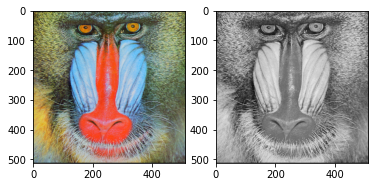

In [ ]:
# Luminance

img = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
color_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

R, G, B = color_img[:, :, 0], color_img[:, :, 1], color_img[:, :, 2]

gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img, cmap='gray')

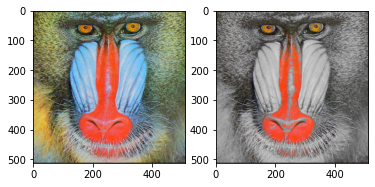

In [ ]:
# Menampilkan warna tertentu
img = cv.imread('/content/drive/MyDrive/pcvk/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_color2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

for tinggi in range(R.shape[0]):
  for lebar in range(R.shape[1]):
    if (img_color[tinggi, lebar, 0]<235 and img_color[tinggi, lebar, 1]>75 and img_color[tinggi, lebar, 2]>20):
      img_color2[tinggi, lebar] = np.mean(img[tinggi, lebar])

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img_color)
axarr[1].imshow(img_color2)